# Final Project – Economic Applications of Machine Learning
# Chess Game Classification
**Team: Adilkhan Sanzhar, Kozachenko Maksim, Kyu Daniil, Sonin Artemiy**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("200k_blitz_rapid_classical_bullet.csv", low_memory=False)

df

,Index,Index.1,Black,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,...,Clock_ply_193,Clock_ply_194,Clock_ply_195,Clock_ply_196,Clock_ply_197,Clock_ply_198,Clock_ply_199,Clock_ply_200,Category,Weekday
0,0,124,albertoPlasta,906,13.0,2019.04.30,B15,Rated Blitz game,Caro-Kann Defense,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday
1,1,494,Luckystriker,1296,28.0,2019.04.30,C50,Rated Blitz game,Italian Game,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday
2,2,552,Verascardoso,1761,-13.0,2019.04.30,C41,Rated Rapid game,Philidor Defense #2,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rapid,Tuesday
3,3,588,Stockfish94,2404,8.0,2019.04.30,B06,Rated Bullet game,Modern Defense,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bullet,Tuesday
4,4,725,deneme12376,1595,-10.0,2019.04.30,B32,Rated Blitz game,Sicilian Defense: Loewenthal Variation,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,23925,Farook38,1491,10.0,2019.05.22,B00,Rated Rapid game,"Nimzowitsch Defense: Kennedy Variation, Linkss...",0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rapid,Wednesday
199996,199996,24136,dauntezz,1549,-10.0,2019.05.22,C21,Rated Classical game,King's Pawn Game: Beyer Gambit,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Classical,Wednesday
199997,199997,24146,alexi_prieto,1450,-11.0,2019.05.22,D20,Rated Blitz game,Queen's Gambit Accepted,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Wednesday
199998,199998,24219,Stradivari2,1588,40.0,2019.05.22,B07,Rated UltraBullet tournament https://lichess.o...,Pirc Defense #5,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bullet,Wednesday


In [ ]:
df["TimeControl"].value_counts()

,count
TimeControl,
600+0,35993
60+0,29087
300+0,28437
900+15,22241
180+0,21791
...,...
2100+6,1
30+40,1
3600+7,1


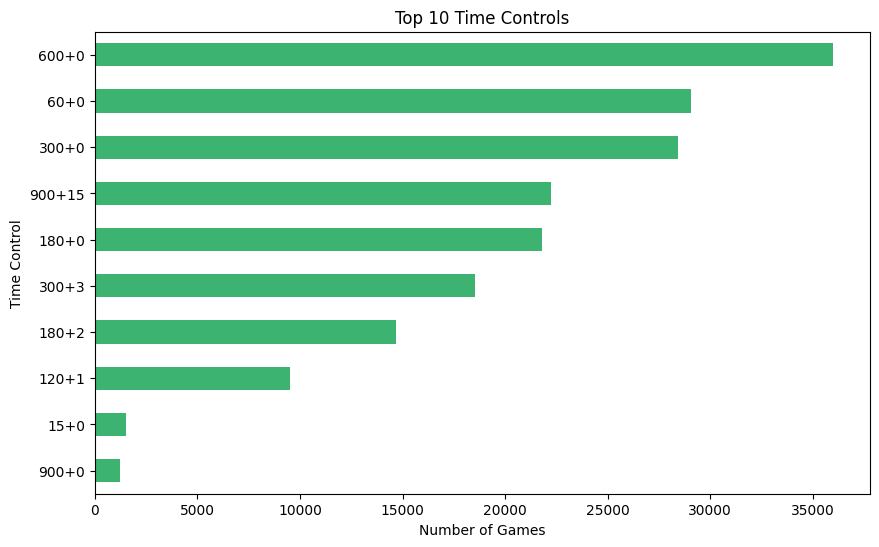

In [ ]:
import matplotlib.pyplot as plt

# Считаем количество уникальных значений в 'TimeControl' и выбираем топ-10
time_control_counts = df['TimeControl'].value_counts().head(10)

plt.figure(figsize=(10, 6))
time_control_counts.plot(kind='barh', color='mediumseagreen')
plt.title("Top 10 Time Controls")
plt.xlabel("Number of Games")
plt.ylabel("Time Control")
plt.gca().invert_yaxis()
plt.show()

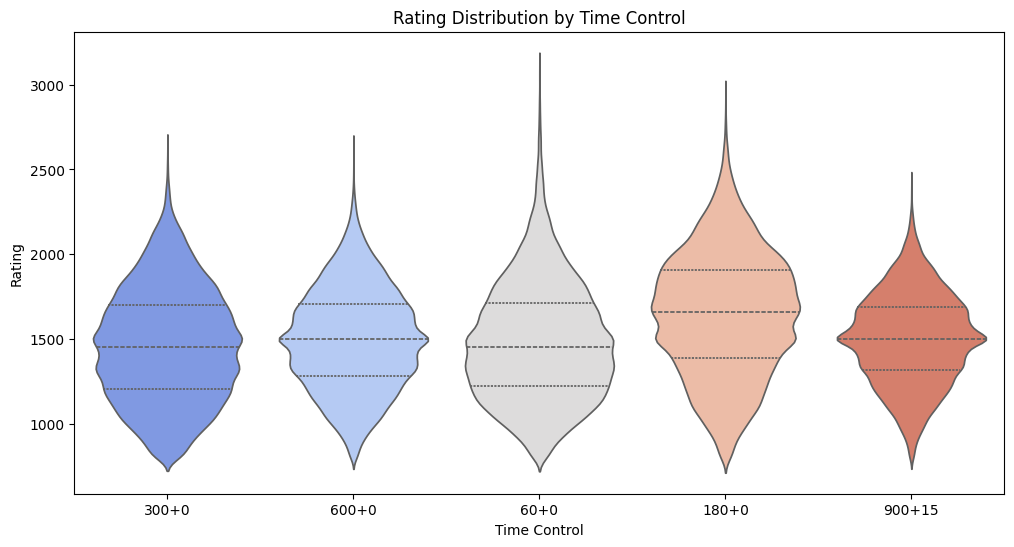

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Переформатируем DataFrame, чтобы объединить рейтинги белых и черных в один столбец
time_control_rating_df = df[['TimeControl', 'WhiteElo', 'BlackElo']].melt(id_vars=['TimeControl'],
                                                                          value_vars=['WhiteElo', 'BlackElo'],
                                                                          var_name='Player', value_name='Rating')

time_control_rating_df = time_control_rating_df.dropna(subset=['Rating'])

top_time_controls = time_control_rating_df['TimeControl'].value_counts().nlargest(5).index
filtered_df = time_control_rating_df[time_control_rating_df['TimeControl'].isin(top_time_controls)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='TimeControl', y='Rating', palette='coolwarm', inner='quartile')
plt.title("Rating Distribution by Time Control")
plt.xlabel("Time Control")
plt.ylabel("Rating")
plt.show()

<Figure size 1200x600 with 0 Axes>

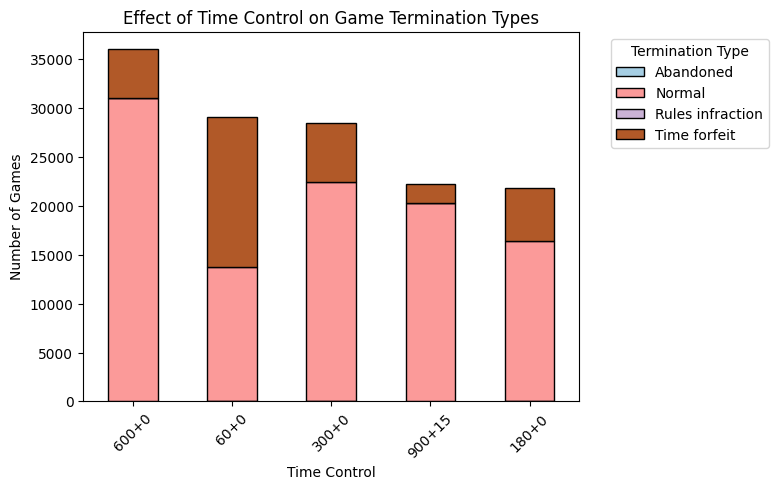

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

time_termination_df = df[['TimeControl', 'Termination']].dropna()

time_termination_counts = time_termination_df.groupby(['TimeControl', 'Termination']).size().unstack().fillna(0)

top_time_controls = time_termination_counts.sum(axis=1).nlargest(5).index
filtered_counts = time_termination_counts.loc[top_time_controls]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='black')
plt.title("Effect of Time Control on Game Termination Types")
plt.xlabel("Time Control")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.legend(title="Termination Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
import pandas as pd

delta_df = pd.DataFrame(index=df.index)

# Проходим по всем ходам, начиная со второго (для первого хода нет предыдущей оценки)
for i in range(2, 200):  # Начинаем с 2, чтобы всегда был предыдущий ход
    current_eval_col = f'Eval_ply_{i}'     # Оценка после текущего хода
    previous_eval_col = f'Eval_ply_{i - 1}' # Оценка после предыдущего хода
    delta_col = f'Delta_ply_{i}'           # Название для колонки с дельтой после текущего хода

    if current_eval_col in df.columns and previous_eval_col in df.columns:
        # Преобразуем оценки в числовой формат, игнорируя ошибки
        df[current_eval_col] = pd.to_numeric(df[current_eval_col], errors='coerce')
        df[previous_eval_col] = pd.to_numeric(df[previous_eval_col], errors='coerce')

        delta_df[delta_col] = df[current_eval_col] - df[previous_eval_col]

delta_df.head()

,Delta_ply_2,Delta_ply_3,Delta_ply_4,Delta_ply_5,Delta_ply_6,Delta_ply_7,Delta_ply_8,Delta_ply_9,Delta_ply_10,Delta_ply_11,...,Delta_ply_190,Delta_ply_191,Delta_ply_192,Delta_ply_193,Delta_ply_194,Delta_ply_195,Delta_ply_196,Delta_ply_197,Delta_ply_198,Delta_ply_199
0,-0.10,-0.30,0.62,-0.34,0.59,-0.06,-0.15,-0.51,1.63,-1.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.25,-0.14,-0.08,0.06,0.25,-0.10,0.02,0.10,-0.12,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.25,-0.14,0.36,-0.43,0.48,-0.17,0.33,0.14,0.01,-0.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.34,-0.18,0.62,-0.21,0.28,-0.06,0.03,-0.09,-0.08,0.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.08,0.01,-0.13,0.07,0.07,-0.14,0.29,-0.12,0.60,-0.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


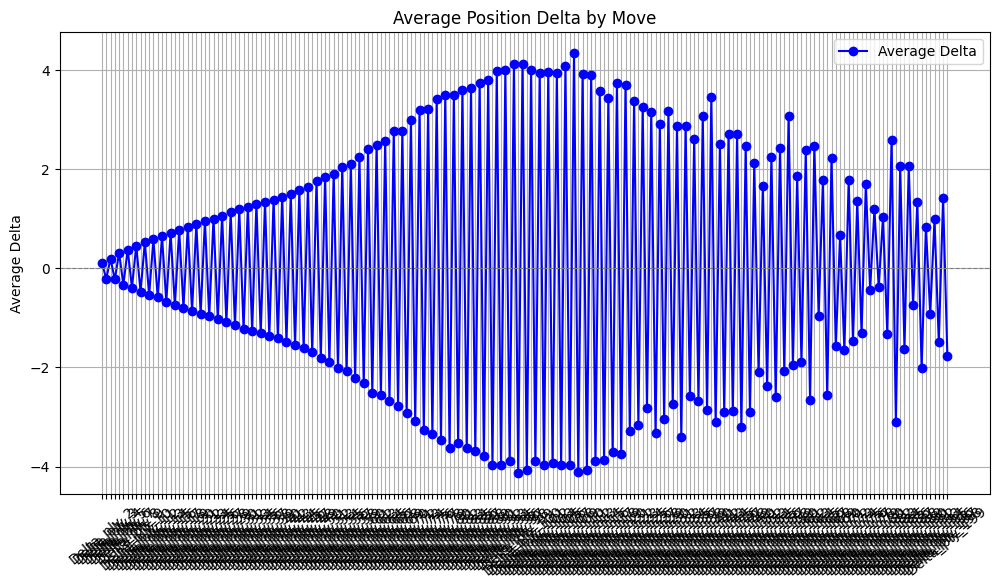

In [ ]:
import matplotlib.pyplot as plt

# Средняя дельта для каждого хода по всем играм
mean_deltas = delta_df.mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_deltas.index, mean_deltas.values, marker='o', color='b', linestyle='-', label='Average Delta')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Average Position Delta by Move")
plt.ylabel("Average Delta")
plt.xticks(rotation=40)
plt.grid()
plt.legend()
plt.show()

# Базовые модели


**RandomForest classifier для буллита**

Accuracy of the model: 0.5342960288808665


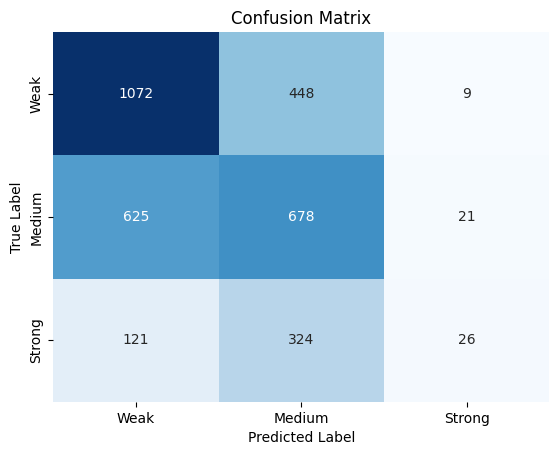


Classification Report:
               precision    recall  f1-score   support

        Weak       0.59      0.70      0.64      1529
      Medium       0.47      0.51      0.49      1324
      Strong       0.46      0.06      0.10       471

    accuracy                           0.53      3324
   macro avg       0.51      0.42      0.41      3324
weighted avg       0.52      0.53      0.50      3324



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

bullet_games = df[df['TimeControl'] == '60+0'].copy()

weak_players = bullet_games[(bullet_games['WhiteElo'] < 1400) & (bullet_games['BlackElo'] < 1400)].copy()
medium_players = bullet_games[(bullet_games['WhiteElo'].isin(range(1400,1850))) & (bullet_games['BlackElo'].isin(range(1400,1850)))].copy()
strong_players = bullet_games[(bullet_games['WhiteElo'] >= 1850) & (bullet_games['BlackElo'] >= 1850)].copy()

weak_players['class'] = 0  # Слабые игроки
medium_players['class'] = 1 # Средние
strong_players['class'] = 2  # Сильные игроки

combined_data = pd.concat([weak_players, medium_players, strong_players])

features = []

for i in range(1, 50):  # Используем первые 50 ходов
    eval_col = f'Eval_ply_{i}'
    delta_col = f'Delta_ply_{i}'

    # Вычисляем дельту, если столбцы существуют
    if eval_col in combined_data.columns:
        combined_data[eval_col] = pd.to_numeric(combined_data[eval_col], errors='coerce')  # Преобразуем в числовой формат
        if i > 1:  # Начинаем с Delta со второго хода
            combined_data[delta_col] = combined_data[eval_col] - combined_data[f'Eval_ply_{i-1}']
            features.append(delta_col)
        features.append(eval_col)

combined_data['Inaccuracies'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum((x.abs() >= 0.8) & (x.abs() < 1.0)), axis=1)
combined_data['Mistakes'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum((x.abs() >= 1.0) & (x.abs() < 2.0)), axis=1)
combined_data['Blunders'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum(x.abs() >= 2.0), axis=1)

features.extend(['Inaccuracies', 'Mistakes', 'Blunders'])

X = combined_data[features].fillna(0)
y = combined_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1 (сильные игроки)

accuracy = accuracy_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')

print("Accuracy of the model:", accuracy)
# print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak','Medium', 'Strong'], yticklabels=['Weak', 'Medium', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Medium', 'Strong'])
print("\nClassification Report:\n", class_report)

**Random Forest на всех данных**

Accuracy of the model: 0.9226844583987441
ROC-AUC of the model: 0.8687165943314545


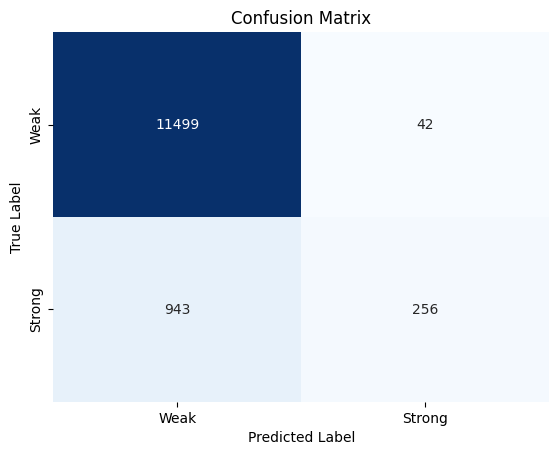


Classification Report:
               precision    recall  f1-score   support

        Weak       0.92      1.00      0.96     11541
      Strong       0.86      0.21      0.34      1199

    accuracy                           0.92     12740
   macro avg       0.89      0.60      0.65     12740
weighted avg       0.92      0.92      0.90     12740



In [ ]:
weak_players = df[(df['WhiteElo'] < 1500) & (df['BlackElo'] < 1500)].copy()
strong_players = df[(df['WhiteElo'] >= 2000) & (df['BlackElo'] >= 2000)].copy()

weak_players['class'] = 0  # Слабые игроки
strong_players['class'] = 1  # Сильные игроки

combined_data = pd.concat([weak_players, strong_players])

features = []

for i in range(1, 50):  # Используем первые 50 ходов
    eval_col = f'Eval_ply_{i}'
    delta_col = f'Delta_ply_{i}'

    # Вычисляем дельту, если столбцы существуют
    if eval_col in combined_data.columns:
        combined_data[eval_col] = pd.to_numeric(combined_data[eval_col], errors='coerce')  # Преобразуем в числовой формат
        if i > 1:  # Начинаем с Delta со второго хода
            combined_data[delta_col] = combined_data[eval_col] - combined_data[f'Eval_ply_{i-1}']
            features.append(delta_col)
        features.append(eval_col)

X = combined_data[features].fillna(0)  # Заполняем NaN значениями 0
y = combined_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1 (сильные игроки)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy of the model:", accuracy)
print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak', 'Strong'], yticklabels=['Weak', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Strong'])
print("\nClassification Report:\n", class_report)

**Логистическая регрессия на все данные**

Accuracy of the model: 0.9142568250758342
ROC-AUC of the model: 0.875628970373837


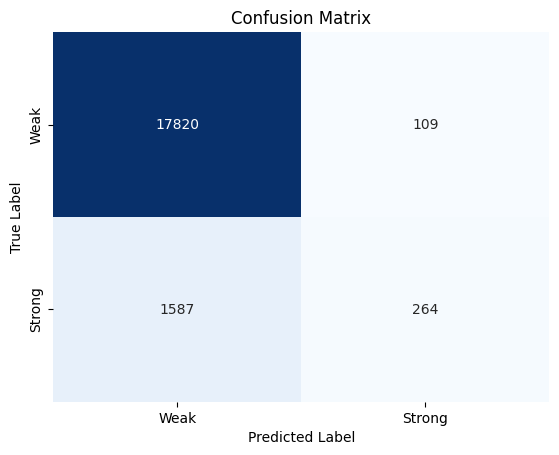


Classification Report:
               precision    recall  f1-score   support

        Weak       0.92      0.99      0.95     17929
      Strong       0.71      0.14      0.24      1851

    accuracy                           0.91     19780
   macro avg       0.81      0.57      0.60     19780
weighted avg       0.90      0.91      0.89     19780



In [ ]:
weak_players = df[(df['WhiteElo'] < 1500) & (df['BlackElo'] < 1500)].copy()
strong_players = df[(df['WhiteElo'] >= 2000) & (df['BlackElo'] >= 2000)].copy()

weak_players['class'] = 0  # Слабые игроки
strong_players['class'] = 1  # Сильные игроки

combined_data = pd.concat([weak_players, strong_players])

features = []

for i in range(1, 50):  # Используем первые 50 ходов
    eval_col = f'Eval_ply_{i}'
    delta_col = f'Delta_ply_{i}'

    # Вычисляем дельту, если столбцы существуют
    if eval_col in combined_data.columns:
        combined_data[eval_col] = pd.to_numeric(combined_data[eval_col], errors='coerce')  # Преобразуем в числовой формат
        if i > 1:  # Начинаем с Delta со второго хода
            combined_data[delta_col] = combined_data[eval_col] - combined_data[f'Eval_ply_{i-1}']
            features.append(delta_col)
        features.append(eval_col)

X = combined_data[features].fillna(0)
y = combined_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Прогнозируем и оцениваем модель
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1 (сильные игроки)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy of the model:", accuracy)
print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak', 'Strong'], yticklabels=['Weak', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Strong'])
print("\nClassification Report:\n", class_report)

**Gradient Boosting на все данные**

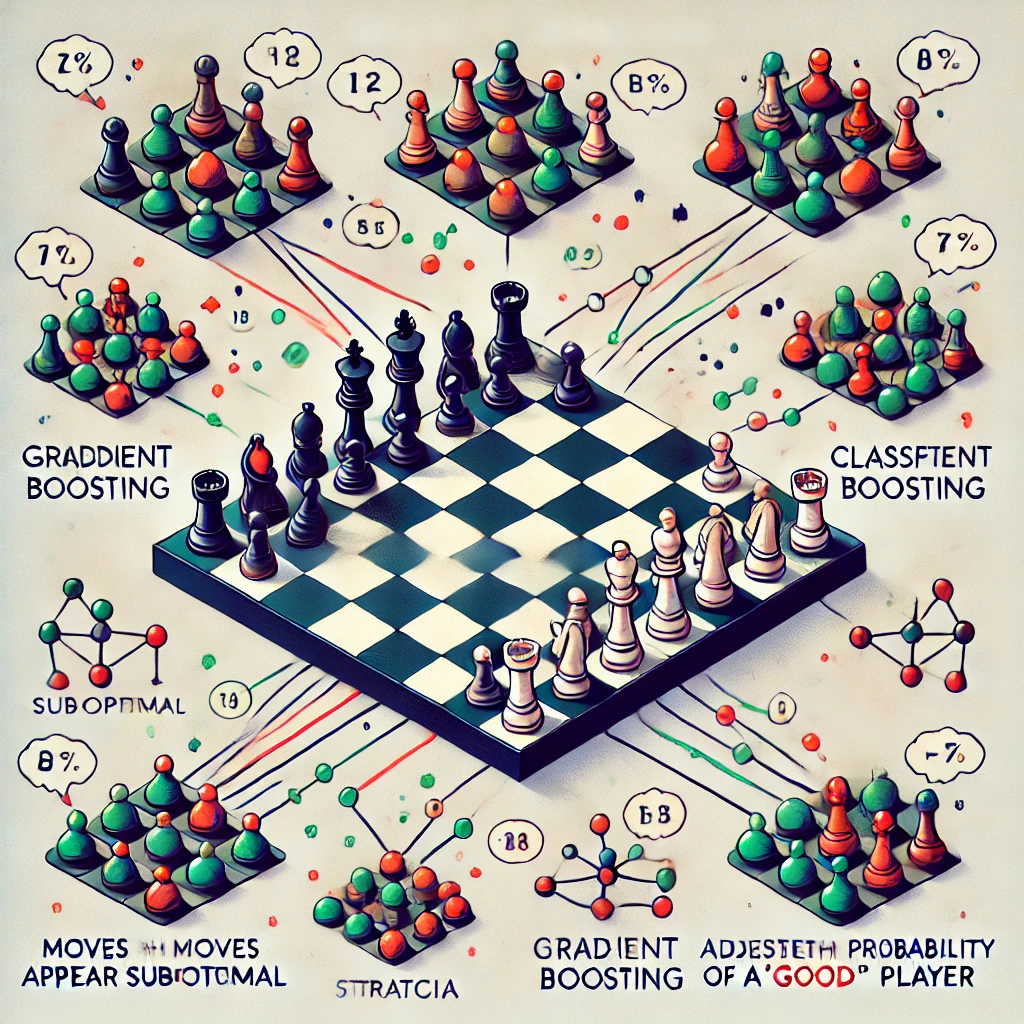

Accuracy of the model: 0.925530839231547
ROC-AUC of the model: 0.8943113720760432


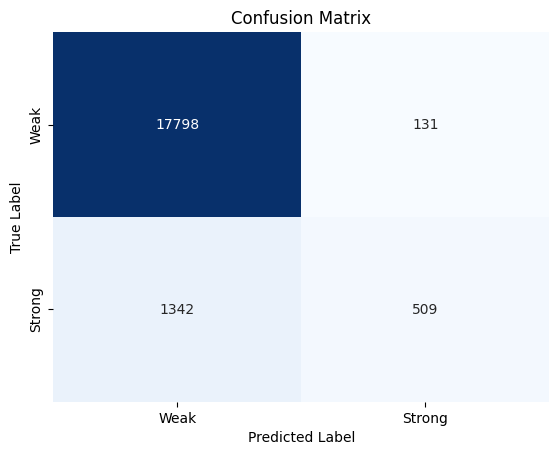


Classification Report:
               precision    recall  f1-score   support

        Weak       0.93      0.99      0.96     17929
      Strong       0.80      0.27      0.41      1851

    accuracy                           0.93     19780
   macro avg       0.86      0.63      0.68     19780
weighted avg       0.92      0.93      0.91     19780



In [ ]:
weak_players = df[(df['WhiteElo'] < 1500) & (df['BlackElo'] < 1500)].copy()
strong_players = df[(df['WhiteElo'] >= 2000) & (df['BlackElo'] >= 2000)].copy()

weak_players['class'] = 0  # Слабые игроки
strong_players['class'] = 1  # Сильные игроки

combined_data = pd.concat([weak_players, strong_players])

features = []

for i in range(1, 50):  # Используем первые 50 ходов
    eval_col = f'Eval_ply_{i}'
    delta_col = f'Delta_ply_{i}'

    if eval_col in combined_data.columns:
        combined_data[eval_col] = pd.to_numeric(combined_data[eval_col], errors='coerce')  # Преобразуем в числовой формат
        if i > 1:  # Начинаем с Delta со второго хода
            combined_data[delta_col] = combined_data[eval_col] - combined_data[f'Eval_ply_{i-1}']
            features.append(delta_col)
        features.append(eval_col)

X = combined_data[features].fillna(0)
y = combined_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1 (сильные игроки)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy of the model:", accuracy)
print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak', 'Strong'], yticklabels=['Weak', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Strong'])
print("\nClassification Report:\n", class_report)

**Random Forest с дополнительными фичами на все данные**

Accuracy of the model: 0.9253286147623863
ROC-AUC of the model: 0.8858151513598311


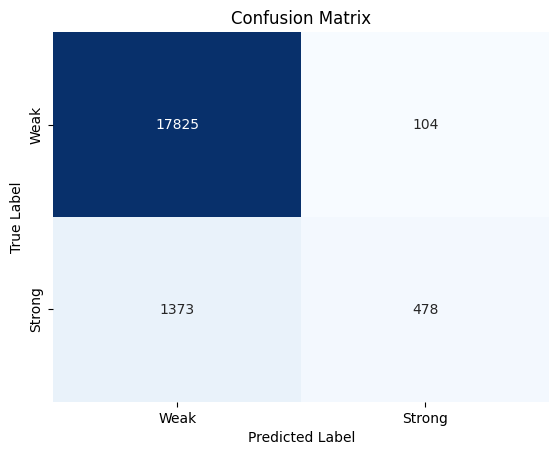


Classification Report:
               precision    recall  f1-score   support

        Weak       0.93      0.99      0.96     17929
      Strong       0.82      0.26      0.39      1851

    accuracy                           0.93     19780
   macro avg       0.87      0.63      0.68     19780
weighted avg       0.92      0.93      0.91     19780



In [ ]:
weak_players = df[(df['WhiteElo'] < 1500) & (df['BlackElo'] < 1500)].copy()
strong_players = df[(df['WhiteElo'] >= 2000) & (df['BlackElo'] >= 2000)].copy()

weak_players['class'] = 0  # Слабые игроки
strong_players['class'] = 1  # Сильные игроки

combined_data = pd.concat([weak_players, strong_players])

features = []

# Вычисляем дельты и оценки для первых 50 ходов, добавляем в новый DataFrame
for i in range(1, 50):  # Используем первые 50 ходов
    eval_col = f'Eval_ply_{i}'
    delta_col = f'Delta_ply_{i}'

    # Вычисляем дельту, если столбцы существуют
    if eval_col in combined_data.columns:
        combined_data[eval_col] = pd.to_numeric(combined_data[eval_col], errors='coerce')  # Преобразуем в числовой формат
        if i > 1:  # Начинаем с Delta со второго хода
            combined_data[delta_col] = combined_data[eval_col] - combined_data[f'Eval_ply_{i-1}']
            features.append(delta_col)
        features.append(eval_col)

combined_data['Inaccuracies'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum((x.abs() >= 0.8) & (x.abs() < 1.0)), axis=1)
combined_data['Mistakes'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum((x.abs() >= 1.0) & (x.abs() < 2.0)), axis=1)
combined_data['Blunders'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum(x.abs() >= 2.0), axis=1)

features.extend(['Inaccuracies', 'Mistakes', 'Blunders'])


X = combined_data[features].fillna(0)
y = combined_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1 (сильные игроки)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy of the model:", accuracy)
print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak', 'Strong'], yticklabels=['Weak', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Strong'])
print("\nClassification Report:\n", class_report)

**Gradient Boosting с дополнительными фичами на все данные**

Accuracy of the model: 0.9277047522750252
ROC-AUC of the model: 0.8948295634810687


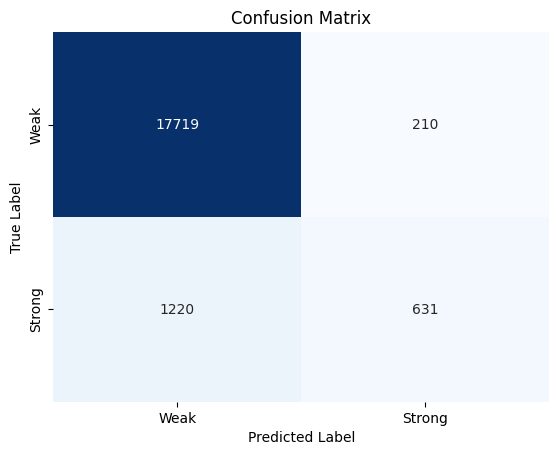


Classification Report:
               precision    recall  f1-score   support

        Weak       0.94      0.99      0.96     17929
      Strong       0.75      0.34      0.47      1851

    accuracy                           0.93     19780
   macro avg       0.84      0.66      0.72     19780
weighted avg       0.92      0.93      0.92     19780



In [ ]:
weak_players = df[(df['WhiteElo'] < 1500) & (df['BlackElo'] < 1500)].copy()
strong_players = df[(df['WhiteElo'] >= 2000) & (df['BlackElo'] >= 2000)].copy()

weak_players['class'] = 0  # Слабые игроки
strong_players['class'] = 1  # Сильные игроки

combined_data = pd.concat([weak_players, strong_players])

features = []

# Вычисляем дельты и оценки для первых 50 ходов, добавляем в новый DataFrame
for i in range(1, 50):  # Используем первые 50 ходов
    eval_col = f'Eval_ply_{i}'
    delta_col = f'Delta_ply_{i}'

    # Вычисляем дельту, если столбцы существуют
    if eval_col in combined_data.columns:
        combined_data[eval_col] = pd.to_numeric(combined_data[eval_col], errors='coerce')  # Преобразуем в числовой формат
        if i > 1:  # Начинаем с Delta со второго хода
            combined_data[delta_col] = combined_data[eval_col] - combined_data[f'Eval_ply_{i-1}']
            features.append(delta_col)
        features.append(eval_col)

combined_data['Inaccuracies'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum((x.abs() >= 0.8) & (x.abs() < 1.0)), axis=1)
combined_data['Mistakes'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum((x.abs() >= 1.0) & (x.abs() < 2.0)), axis=1)
combined_data['Blunders'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum(x.abs() >= 2.0), axis=1)

features.extend(['Inaccuracies', 'Mistakes', 'Blunders'])

X = combined_data[features].fillna(0)  # Заполняем NaN значениями 0
y = combined_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1 (сильные игроки)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy of the model:", accuracy)
print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak', 'Strong'], yticklabels=['Weak', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Strong'])
print("\nClassification Report:\n", class_report)

**Нейросеть на 5% данных с доп фичами**

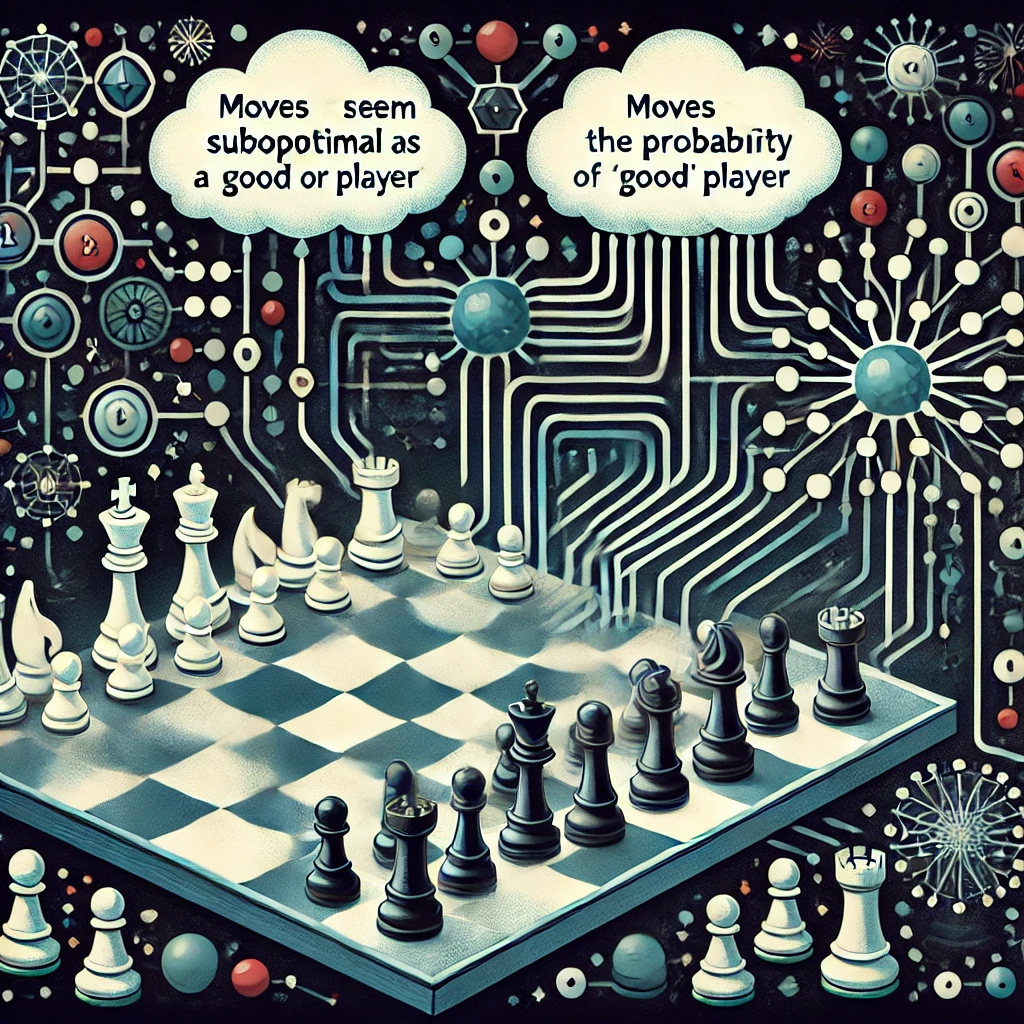


In [ ]:
df = pd.read_csv("200k_blitz_rapid_classical_bullet.csv", nrows=10000, low_memory=False)

weak_players = df[(df['WhiteElo'] < 1500) & (df['BlackElo'] < 1500)].copy()
strong_players = df[(df['WhiteElo'] >= 2000) & (df['BlackElo'] >= 2000)].copy()

weak_players['class'] = 0  # Слабые игроки
strong_players['class'] = 1  # Сильные игроки

combined_data = pd.concat([weak_players, strong_players])

features = []

for i in range(1, 50):  # Используем первые 50 ходов
    eval_col = f'Eval_ply_{i}'
    delta_col = f'Delta_ply_{i}'

    # Вычисляем дельту, если столбцы существуют
    if eval_col in combined_data.columns:
        combined_data[eval_col] = pd.to_numeric(combined_data[eval_col], errors='coerce')  # Преобразуем в числовой формат
        if i > 1:  # Начинаем с Delta со второго хода
            combined_data[delta_col] = combined_data[eval_col] - combined_data[f'Eval_ply_{i-1}']
            features.append(delta_col)
        features.append(eval_col)

combined_data['Inaccuracies'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum((x.abs() >= 0.8) & (x.abs() < 1.0)), axis=1)
combined_data['Mistakes'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum((x.abs() >= 1.0) & (x.abs() < 2.0)), axis=1)
combined_data['Blunders'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum(x.abs() >= 2.0), axis=1)

features.extend(['Inaccuracies', 'Mistakes', 'Blunders'])


X = combined_data[features].fillna(0)
y = combined_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Архитектура модели нейронной сети

- **Тип модели:** Полносвязная нейронная сеть (Feedforward Neural Network)
- **Структура модели:**
  1. **Входной слой:**
     - 64 нейрона
     - Активация: ReLU
     - Входные данные: 100 признаков
  2. **Слой регуляризации:**
     - Dropout (0.5)
  3. **Скрытый слой:**
     - 32 нейрона
     - Активация: ReLU
  4. **Слой регуляризации:**
     - Dropout (0.5)
  5. **Выходной слой:**
     - 1 нейрон
     - Активация: Sigmoid (вероятность принадлежности к классу 1)

- **Компиляция модели:**
  - Оптимизатор: Adam (learning rate = 0.001)
  - Функция потерь: Бинарная кросс-энтропия
  - Метрика: Точность (Accuracy)

- **Параметры обучения:**
  - Количество эпох: 20
  - Размер батча: 32


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import tensorflow as tf

model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

epochs = 20
batch_size = 32
num_batches = len(X_train) // batch_size

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    with tqdm(total=num_batches, desc="Training", unit="batch") as pbar:
        for i in range(0, len(X_train), batch_size):
            batch_X = X_train[i:i + batch_size]
            batch_y = y_train[i:i + batch_size]
            loss, acc = model.train_on_batch(batch_X, batch_y)
            pbar.set_postfix(loss=loss, accuracy=acc)
            pbar.update(1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


Epoch 1/20


Training:   4%|▍         | 5/125 [00:02<00:39,  3.06batch/s, accuracy=0.65, loss=1.9257891]WARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_train_function.<locals>.one_step_on_iterator at 0x7cd43385f490> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
Training: 126batch [00:35,  3.52batch/s, accuracy=0.83779055, loss=0.7081444]


Epoch 2/20


Training: 126batch [00:34,  3.69batch/s, accuracy=0.85866034, loss=0.5540688]


Epoch 3/20


Training: 126batch [00:40,  3.08batch/s, accuracy=0.86861616, loss=0.49016446]


Epoch 4/20


Training: 126batch [00:37,  3.35batch/s, accuracy=0.87621844, loss=0.44818]


Epoch 5/20


Training: 126batch [01:04,  1.96batch/s, accuracy=0.88132966, loss=0.41958147]


Epoch 6/20


Training: 126batch [01:02,  2.02batch/s, accuracy=0.88444555, loss=0.39748412]


Epoch 7/20


Training: 126batch [00:44,  2.86batch/s, accuracy=0.8870997, loss=0.37994564]


Epoch 8/20


Training: 126batch [00:44,  2.81batch/s, accuracy=0.8889965, loss=0.36786765]


Epoch 9/20


Training: 126batch [00:50,  2.51batch/s, accuracy=0.8906107, loss=0.35683903]


Epoch 10/20


Training: 126batch [00:50,  2.47batch/s, accuracy=0.89182705, loss=0.34867382]


Epoch 11/20


Training: 126batch [00:52,  2.38batch/s, accuracy=0.8929813, loss=0.3414324]


Epoch 12/20


Training: 126batch [00:54,  2.33batch/s, accuracy=0.89398485, loss=0.33469465]


Epoch 13/20


Training: 126batch [01:07,  1.87batch/s, accuracy=0.8948147, loss=0.3288662]


Epoch 14/20


Training: 126batch [01:00,  2.08batch/s, accuracy=0.8955083, loss=0.32357094]


Epoch 15/20


Training: 126batch [01:13,  1.70batch/s, accuracy=0.8961593, loss=0.31884643]


Epoch 16/20


Training: 126batch [01:00,  2.09batch/s, accuracy=0.8966821, loss=0.31463596]


Epoch 17/20


Training: 126batch [01:02,  2.01batch/s, accuracy=0.8971875, loss=0.31087756]


Epoch 18/20


Training: 126batch [01:03,  1.98batch/s, accuracy=0.8976228, loss=0.30708227]


Epoch 19/20


Training: 126batch [01:15,  1.66batch/s, accuracy=0.8980386, loss=0.30387625]


Epoch 20/20


Training: 126batch [01:13,  1.72batch/s, accuracy=0.8984129, loss=0.30061275]


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8969 - loss: 0.2437
Test loss: 0.24040374159812927, Test accuracy: 0.8951048851013184


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy of the model: 0.8951048951048951
ROC-AUC of the model: 0.8856292517006803


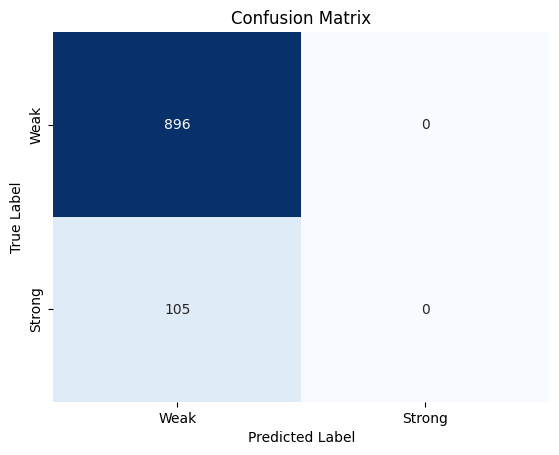


Classification Report:
               precision    recall  f1-score   support

        Weak       0.90      1.00      0.94       896
      Strong       0.00      0.00      0.00       105

    accuracy                           0.90      1001
   macro avg       0.45      0.50      0.47      1001
weighted avg       0.80      0.90      0.85      1001



In [ ]:
y_pred_prob = model.predict(X_test)  # Вероятности для класса 1 (сильные игроки)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Преобразуем вероятности в классы

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy of the model:", accuracy)
print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak', 'Strong'], yticklabels=['Weak', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Strong'])
print("\nClassification Report:\n", class_report)


**Нейросеть на все данные с доп фичами**

In [ ]:
df = pd.read_csv("200k_blitz_rapid_classical_bullet.csv", low_memory=False)

weak_players = df[(df['WhiteElo'] < 1500) & (df['BlackElo'] < 1500)].copy()
strong_players = df[(df['WhiteElo'] >= 2000) & (df['BlackElo'] >= 2000)].copy()

weak_players['class'] = 0  # Слабые игроки
strong_players['class'] = 1  # Сильные игроки

# Объединяем данные слабых и сильных игроков
combined_data = pd.concat([weak_players, strong_players])

# Инициализируем списки для хранения признаков
features = []

# Вычисляем дельты и оценки для первых 50 ходов, добавляем в новый DataFrame
for i in range(1, 50):  # Используем первые 50 ходов
    eval_col = f'Eval_ply_{i}'
    delta_col = f'Delta_ply_{i}'

    # Вычисляем дельту, если столбцы существуют
    if eval_col in combined_data.columns:
        combined_data[eval_col] = pd.to_numeric(combined_data[eval_col], errors='coerce')  # Преобразуем в числовой формат
        if i > 1:  # Начинаем с Delta со второго хода
            combined_data[delta_col] = combined_data[eval_col] - combined_data[f'Eval_ply_{i-1}']
            features.append(delta_col)
        features.append(eval_col)

combined_data['Inaccuracies'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum((x.abs() >= 0.8) & (x.abs() < 1.0)), axis=1)
combined_data['Mistakes'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum((x.abs() >= 1.0) & (x.abs() < 2.0)), axis=1)
combined_data['Blunders'] = combined_data[[f'Delta_ply_{i}' for i in range(2, 50) if f'Delta_ply_{i}' in combined_data.columns]].apply(lambda x: np.sum(x.abs() >= 2.0), axis=1)

# Добавляем новые признаки в список для модели
features.extend(['Inaccuracies', 'Mistakes', 'Blunders'])


X = combined_data[features].fillna(0)
y = combined_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Вариант 1

### Архитектура модели нейронной сети

- **Тип модели:** Полносвязная нейронная сеть (Feedforward Neural Network)
- **Структура модели:**
  1. **Входной слой:**
     - 128 нейронов
     - Активация: ReLU
     - Входные данные: 100 признаков
  2. **Слой нормализации:**
     - Batch Normalization
  3. **Слой регуляризации:**
     - Dropout (0.3)
  4. **Скрытый слой:**
     - 64 нейрона
     - Активация: ReLU
  5. **Слой нормализации:**
     - Batch Normalization
  6. **Слой регуляризации:**
     - Dropout (0.3)
  7. **Скрытый слой:**
     - 32 нейрона
     - Активация: ReLU
  8. **Слой нормализации:**
     - Batch Normalization
  9. **Слой регуляризации:**
     - Dropout (0.3)
  10. **Выходной слой:**
      - 1 нейрон
      - Активация: Sigmoid (вероятность принадлежности к классу 1)

- **Компиляция модели:**
  - Оптимизатор: Adam (learning rate = 0.001)
  - Функция потерь: Бинарная кросс-энтропия
  - Метрика: Точность (Accuracy)

- **Параметры обучения:**
  - Количество эпох: 20
  - Размер батча: 64
  - Валидационное разделение: 20%

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import tensorflow as tf

model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[TqdmCallback(verbose=1)])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7746 - loss: 0.4743 - val_accuracy: 0.9077 - val_loss: 0.2309
Epoch 2/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9051 - loss: 0.2483 - val_accuracy: 0.9115 - val_loss: 0.2260
Epoch 3/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9066 - loss: 0.2380 - val_accuracy: 0.9072 - val_loss: 0.2264
Epoch 4/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9083 - loss: 0.2338 - val_accuracy: 0.9149 - val_loss: 0.2230
Epoch 5/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9102 - loss: 0.2315 - val_accuracy: 0.9108 - val_loss: 0.2232
Epoch 6/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9124 - loss: 0.2270 - val_accuracy: 0.9170 - val_loss: 0.2211
Epoch 7/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9099 - loss: 0.2289 - val_accuracy: 0.9154 - val_loss: 0.2232
Epoch 8/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9139 - loss: 0.2206 - val_accuracy:

619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Accuracy of the model: 0.9219413549039434
ROC-AUC of the model: 0.8791562396353055


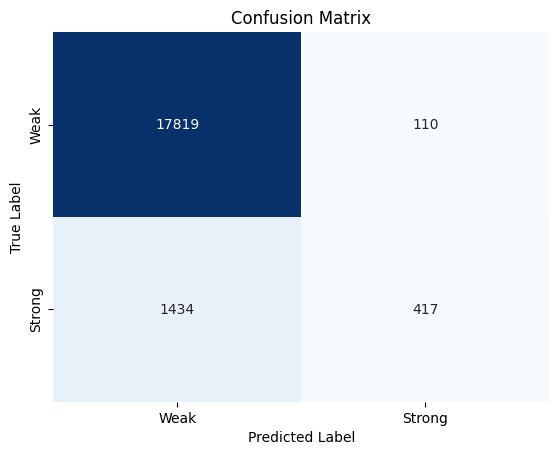


Classification Report:
               precision    recall  f1-score   support

        Weak       0.93      0.99      0.96     17929
      Strong       0.79      0.23      0.35      1851

    accuracy                           0.92     19780
   macro avg       0.86      0.61      0.65     19780
weighted avg       0.91      0.92      0.90     19780



In [ ]:
y_pred_prob = model.predict(X_test)  # Вероятности для класса 1 (сильные игроки)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Преобразуем вероятности в классы

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy of the model:", accuracy)
print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak', 'Strong'], yticklabels=['Weak', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Strong'])
print("\nClassification Report:\n", class_report)


### Вариант 2

### Архитектура модели нейронной сети

- **Тип модели:** Полносвязная нейронная сеть (Feedforward Neural Network)
- **Структура модели:**
  1. **Входной слой:**
     - 128 нейронов
     - Активация: ReLU
     - Входные данные: 100 признаков
  2. **Слой нормализации:**
     - Batch Normalization
  3. **Слой регуляризации:**
     - Dropout (0.3)
  4. **Скрытый слой:**
     - 64 нейрона
     - Активация: ReLU
  5. **Слой нормализации:**
     - Batch Normalization
  6. **Слой регуляризации:**
     - Dropout (0.3)
  7. **Скрытый слой:**
     - 32 нейрона
     - Активация: ReLU
  8. **Слой нормализации:**
     - Batch Normalization
  9. **Слой регуляризации:**
     - Dropout (0.3)
  10. **Скрытый слой:**
      - 16 нейронов
      - Активация: ReLU
  11. **Слой нормализации:**
      - Batch Normalization
  12. **Слой регуляризации:**
      - Dropout (0.3)
  13. **Выходной слой:**
      - 1 нейрон
      - Активация: Sigmoid (вероятность принадлежности к классу 1)

- **Компиляция модели:**
  - Оптимизатор: Adam (learning rate = 0.001)
  - Функция потерь: Бинарная кросс-энтропия
  - Метрика: Точность (Accuracy)

- **Параметры обучения:**
  - Количество эпох: 20
  - Размер батча: 128
  - Валидационное разделение: 20%


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tqdm.keras import TqdmCallback
import tensorflow as tf

model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),  # Дополнительный слой
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[TqdmCallback(verbose=1)])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7142 - loss: 0.6092 - val_accuracy: 0.9044 - val_loss: 0.2478
Epoch 2/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9014 - loss: 0.2683 - val_accuracy: 0.9079 - val_loss: 0.2290
Epoch 3/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9032 - loss: 0.2505 - val_accuracy: 0.9072 - val_loss: 0.2274
Epoch 4/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9072 - loss: 0.2410 - val_accuracy: 0.9096 - val_loss: 0.2247
Epoch 5/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9069 - loss: 0.2393 - val_accuracy: 0.9086 - val_loss: 0.2251
Epoch 6/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9077 - loss: 0.2357 - val_accuracy: 0.9115 - val_loss: 0.2253
Epoch 7/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9090 - loss: 0.2338 - val_accuracy: 0.9133 - val_loss: 0.2237
Epoch 8/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9100 - loss: 0.2308 - val_accura

619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Accuracy of the model: 0.9220424671385238
ROC-AUC of the model: 0.8805793450418617


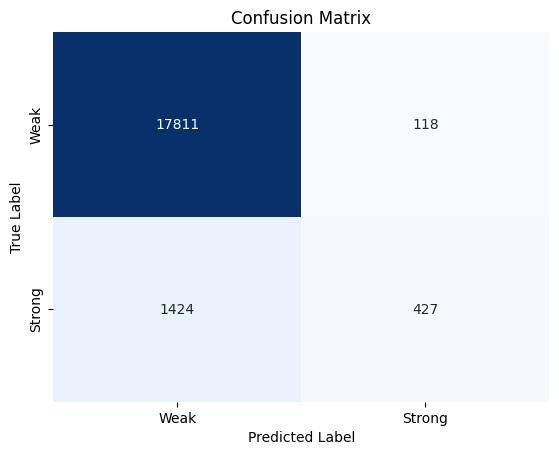


Classification Report:
               precision    recall  f1-score   support

        Weak       0.93      0.99      0.96     17929
      Strong       0.78      0.23      0.36      1851

    accuracy                           0.92     19780
   macro avg       0.85      0.61      0.66     19780
weighted avg       0.91      0.92      0.90     19780



In [ ]:
y_pred_prob = model.predict(X_test)  # Вероятности для класса 1 (сильные игроки)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Преобразуем вероятности в классы

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy of the model:", accuracy)
print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak', 'Strong'], yticklabels=['Weak', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Strong'])
print("\nClassification Report:\n", class_report)


### Вариант 3

### Архитектура модели нейронной сети

Аналогична варианту 2, но

- **Параметры обучения:**
  - Количество эпох: 30
  - Размер батча: 64


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tqdm.keras import TqdmCallback
import tensorflow as tf

model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),  # Дополнительный слой
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[TqdmCallback(verbose=1)])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7447 - loss: 0.5103 - val_accuracy: 0.9048 - val_loss: 0.2378
Epoch 2/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9023 - loss: 0.2596 - val_accuracy: 0.9051 - val_loss: 0.2309
Epoch 3/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9061 - loss: 0.2441 - val_accuracy: 0.9056 - val_loss: 0.2301
Epoch 4/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9046 - loss: 0.2402 - val_accuracy: 0.9062 - val_loss: 0.2267
Epoch 5/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9050 - loss: 0.2395 - val_accuracy: 0.9108 - val_loss: 0.2237
Epoch 6/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9036 - loss: 0.2381 - val_accuracy: 0.9153 - val_loss: 0.2219
Epoch 7/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9060 - loss: 0.2377 - val_accuracy: 0.9111 - val_loss: 0.2235
Epoch 8/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9087 - loss: 0.2331 - val_

619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy of the model: 0.920525783619818
ROC-AUC of the model: 0.8807771509079018


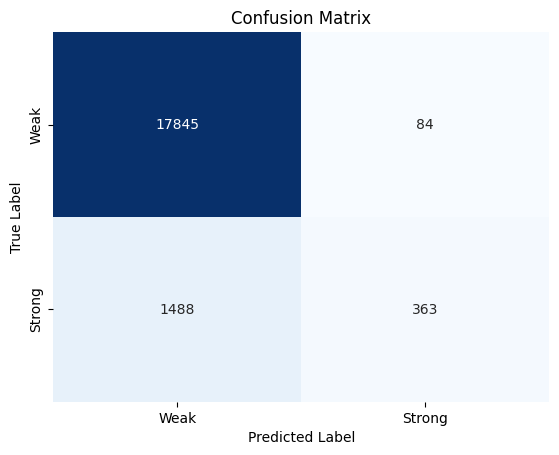


Classification Report:
               precision    recall  f1-score   support

        Weak       0.92      1.00      0.96     17929
      Strong       0.81      0.20      0.32      1851

    accuracy                           0.92     19780
   macro avg       0.87      0.60      0.64     19780
weighted avg       0.91      0.92      0.90     19780



In [ ]:
y_pred_prob = model.predict(X_test)  # Вероятности для класса 1 (сильные игроки)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Преобразуем вероятности в классы

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy of the model:", accuracy)
print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak', 'Strong'], yticklabels=['Weak', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Strong'])
print("\nClassification Report:\n", class_report)


### Вариант 4

### Архитектура модели нейронной сети

Аналогична варианту 2, но

- **Параметры обучения:**
  - Количество эпох: 50


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tqdm.keras import TqdmCallback
import tensorflow as tf

model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[TqdmCallback(verbose=1)])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6917 - loss: 0.6152 - val_accuracy: 0.9084 - val_loss: 0.2526
Epoch 2/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8988 - loss: 0.2753 - val_accuracy: 0.9048 - val_loss: 0.2332
Epoch 3/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9025 - loss: 0.2530 - val_accuracy: 0.9050 - val_loss: 0.2298
Epoch 4/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9055 - loss: 0.2455 - val_accuracy: 0.9077 - val_loss: 0.2267
Epoch 5/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9062 - loss: 0.2408 - val_accuracy: 0.9082 - val_loss: 0.2251
Epoch 6/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9062 - loss: 0.2388 - val_accuracy: 0.9132 - val_loss: 0.2225
Epoch 7/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9074 - loss: 0.2365 - val_accuracy: 0.9143 - val_loss: 0.2226
Epoch 8/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9090 - loss: 0.2303 - val_accur

619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
Accuracy of the model: 0.9220424671385238
ROC-AUC of the model: 0.8803052583395233


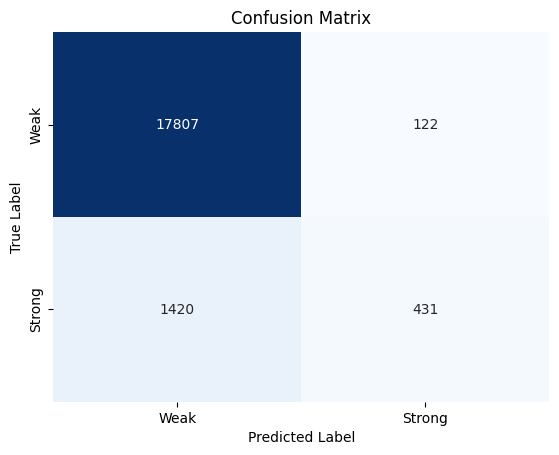


Classification Report:
               precision    recall  f1-score   support

        Weak       0.93      0.99      0.96     17929
      Strong       0.78      0.23      0.36      1851

    accuracy                           0.92     19780
   macro avg       0.85      0.61      0.66     19780
weighted avg       0.91      0.92      0.90     19780



In [ ]:
y_pred_prob = model.predict(X_test)  # Вероятности для класса 1 (сильные игроки)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Преобразуем вероятности в классы

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy of the model:", accuracy)
print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak', 'Strong'], yticklabels=['Weak', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Strong'])
print("\nClassification Report:\n", class_report)


### Вариант 5

### Архитектура модели нейронной сети

Аналогична варианту 2, но

- **Параметры обучения:**
  - Количество эпох: 30
  - Размер батча: 256


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tqdm.keras import TqdmCallback
import tensorflow as tf

model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, batch_size=256, validation_split=0.2, callbacks=[TqdmCallback(verbose=1)])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6172 - loss: 0.6855 - val_accuracy: 0.9063 - val_loss: 0.3280
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8853 - loss: 0.3422 - val_accuracy: 0.9092 - val_loss: 0.2412
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9009 - loss: 0.2664 - val_accuracy: 0.9108 - val_loss: 0.2298
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9023 - loss: 0.2532 - val_accuracy: 0.9074 - val_loss: 0.2288
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9047 - loss: 0.2457 - val_accuracy: 0.9067 - val_loss: 0.2297
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9068 - loss: 0.2416 - val_accuracy: 0.9096 - val_loss: 0.2263
Epoch 7/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9090 - loss: 0.2369 - val_accuracy: 0.9096 - val_loss: 0.2258
Epoch 8/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9072 - loss: 0.2392 - val_acc

619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Accuracy of the model: 0.9232558139534883
ROC-AUC of the model: 0.8805989614054525


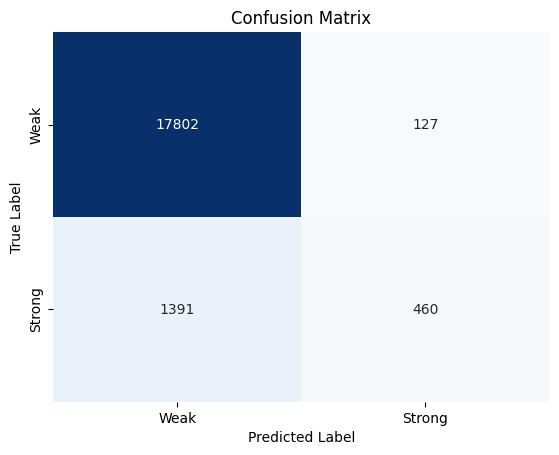


Classification Report:
               precision    recall  f1-score   support

        Weak       0.93      0.99      0.96     17929
      Strong       0.78      0.25      0.38      1851

    accuracy                           0.92     19780
   macro avg       0.86      0.62      0.67     19780
weighted avg       0.91      0.92      0.90     19780



In [ ]:
y_pred_prob = model.predict(X_test)  # Вероятности для класса 1 (сильные игроки)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Преобразуем вероятности в классы

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy of the model:", accuracy)
print("ROC-AUC of the model:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Weak', 'Strong'], yticklabels=['Weak', 'Strong'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Weak', 'Strong'])
print("\nClassification Report:\n", class_report)